In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def count_features(df):
    n_syntax = 0
    n_morphological = 0
    n_inventory = 0
    n_phonological = 0
    for feature in df.columns:
        if feature.startswith('S_'):
            n_syntax += 1
        elif feature.startswith('M_'):
            n_morphological += 1
        elif feature.startswith('INV_'):
            n_inventory += 1
        elif feature.startswith('P_'):
            n_phonological += 1
        else:
            raise ValueError(f"Unknown feature type for {feature}")
    return n_syntax, n_morphological, n_inventory, n_phonological

In [5]:
baseline = pd.read_csv('../data/URIELPlus_Union.csv', index_col=0)
base_syntax, base_morphological, base_inventory, base_phonological = count_features(baseline)

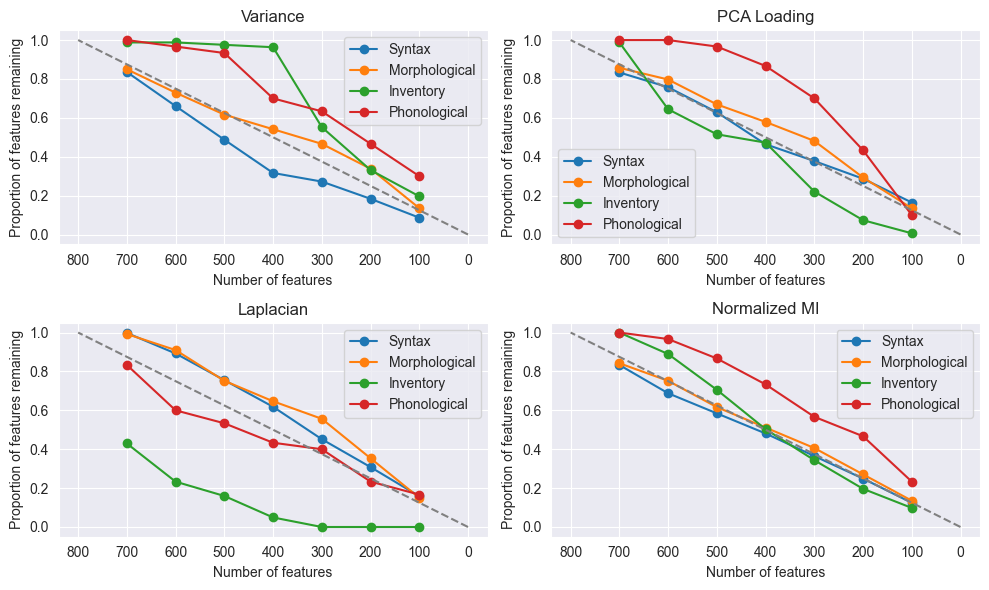

In [19]:
methods = ['variance', 'PCA_importance', 'laplacian', 'mi']
names = ['Variance', 'PCA Loading', 'Laplacian', 'Normalized MI']

fig, ax = plt.subplots(2, 2, figsize=(10, 6))

for k in range(len(methods)):
    feats = {
        'syntax': [],
        'morphological': [],
        'inventory': [],
        'phonological': []
    }
    for i in range(100, 701, 100):
        df = pd.read_csv(f'../selection_result/imputed_{methods[k]}_{i}.csv', index_col=0)
        n_syntax, n_morphological, n_inventory, n_phonological = count_features(df)
        feats['syntax'].append(n_syntax / base_syntax)
        feats['morphological'].append(n_morphological / base_morphological)
        feats['inventory'].append(n_inventory / base_inventory)
        feats['phonological'].append(n_phonological / base_phonological)
    ax[k//2, k%2].plot(range(100, 701, 100), feats['syntax'], label='Syntax', marker='o')
    ax[k//2, k%2].plot(range(100, 701, 100), feats['morphological'], label='Morphological', marker='o')
    ax[k//2, k%2].plot(range(100, 701, 100), feats['inventory'], label='Inventory', marker='o')
    ax[k//2, k%2].plot(range(100, 701, 100), feats['phonological'], label='Phonological', marker='o')
    ax[k//2, k%2].plot([0, 800], [0, 1], '--', color='gray')
    ax[k//2, k%2].set_title(names[k])
    ax[k//2, k%2].set_xlabel('Number of features')
    ax[k//2, k%2].invert_xaxis()
    ax[k//2, k%2].set_ylabel('Proportion of features remaining')
    ax[k//2, k%2].legend()
plt.tight_layout()
plt.show()